TASK-3B: Please provide an analysis (mean and std) for the volumes of hippocampus with respect to the level of AD(Alzheimer's Disease).

>Gerekli kütüphanelerin çağırılmasıyla başlıyorum.

In [93]:
import pandas as pd
import numpy as np

>Ardından verileri çağırıyorum.

In [94]:
data_all = pd.read_csv("MRI_and_CDRinfo_Values_X_train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,24,41,46,48,51,90,91,92,93,94,95,96,97,98,99,100,167,205,208,210,213,216,219,221,223,225,227,229,231,235,237,239,241,243,245,247,249,251,253,255,365,380,382,384,402,404,406,551,634,651,654,659,689,770,776,900,908,943,946,964,965,974,1176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [95]:
data_labels = pd.read_csv("CDR_Values_y_train.csv")

>Veri setimde boşluk olup olmadığını kontrol ediyorum.

In [96]:
data_labels.isnull().sum()

Unnamed: 0    0
CDRGLOB       0
dtype: int64

In [97]:
data_all.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
index_x           0
NACCID_x          0
NACCADC_x         0
                 ..
RTRTEM            0
RTRTEMM           0
NACCNMRI_y        0
NACCVNUM_y        0
original_ind_y    0
Length: 1380, dtype: int64

> Verileri ekrana bastırdığımda tüm satır ve sütunları görebilmek adına pandasın default ayarını değiştiriyorum.

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)
pd.set_option('display.width',1000)

> Verileri ekrana bastırıyorum.

In [99]:
data_all

Unnamed: 0  Unnamed: 0.1  index_x    NACCID_x  NACCADC_x PACKET  FORMVER  VISITMO  VISITDAY  VISITYR  NACCVNUM_x  NACCAVST  NACCNVST  NACCDAYS  NACCFDYS  NACCREAS  NACCREFR  BIRTHMO  BIRTHYR  SEX  HISPANIC  HISPOR HISPORX  RACE RACEX  RACESEC  RACETER  PRIMLANG  PRIMLANX  EDUC  MARISTAT  NACCLIVS  INDEPEND  RESIDENC  HANDED  INBIRMO  INBIRYR  INSEX  NEWINF  INHISP  INHISPOR INHISPOX  NACCNINR  INRACE INRACEX  INRASEC INRASECX  INRATER INRATERX  INEDUC  INRELTO INRELTOX  INKNOWN  INLIVWTH  INVISITS  INCALLS  INRELY  NACCFAM  NACCMOM  NACCDAD  NACCAM NACCAMX  NACCAMS NACCAMSX  NACCFM NACCFMX  NACCFMS NACCFMSX  NACCOM NACCOMX  NACCOMS NACCOMSX  NACCFADM  ANYMEDS                                DRUG1           DRUG2                                DRUG3                                DRUG4                       DRUG5           DRUG6        DRUG7          DRUG8      DRUG9                               DRUG10          DRUG11        DRUG12      DRUG13       DRUG14 DRUG15 DRUG16 DRUG17  \
0           1970          1970   116428  NACC831508       6518      I      1.0        5        23     2007           1         1         1         0         0         1         8       11     1914    2         0      88     NaN     1   NaN       88       88         1       NaN     8         2         1         1         3       1        5     1939      1      -4       0        88      NaN         1       1     NaN       88      NaN       88      NaN      20        2      NaN       -4         0         3        2       0        0        0        0      -4     NaN       -4      NaN      -4     NaN       -4      NaN      -4     NaN       -4      NaN         0        1                             ATENOLOL      FUROSEMIDE                          GEMFIBROZIL                            GLIPIZIDE               LEVOTHYROXINE      LOVASTATIN   PREDNISONE            NaN        NaN                                  NaN             NaN           NaN         NaN          NaN    NaN    NaN    NaN   
1           1146          1146   110463  NACC719761       6499      I      2.0        9        24     2010           1         1         1         0         0         1         8        1     1963    2         0      88     NaN     1   NaN       88       88         1       NaN    16         1         2         1         1       2        3     1960      1      -4       0        88      NaN         1       1     NaN       88      NaN       88      NaN      16        1      NaN       -4         1         8        8       0        1        0        1      -4     NaN       -4      NaN      -4     NaN       -4      NaN      -4     NaN       -4      NaN         0        1                            IBUPROFEN  CYANOCOBALAMIN                      PSEUDOEPHEDRINE                                  NaN                         NaN             NaN          NaN            NaN        NaN                                  NaN             NaN           NaN         NaN          NaN    NaN    NaN    NaN   
2            675           675   106548  NACC979197       6061      F      2.0        7        18     2012           3         8         8      4292      1549         1         2        4     1946    2         0      88     NaN     1   NaN       88       88         1       NaN    18         1         2         1         1       2       12     1943      1       0      -4        -4      NaN         1      -4     NaN       -4      NaN       -4      NaN      -4        1      NaN       -4         1         8        8       0        1        0        1       9     NaN        9      NaN       9     NaN        9      NaN       9     NaN        9      NaN         0        1                        AMITRIPTYLINE   LEVOTHYROXINE                       CYANOCOBALAMIN  OMEGA-3 POLYUNSATURATED FATTY ACIDS           LIDOCAINE TOPICAL  ERGOCALCIFEROL  VENLAFAXINE      METFORMIN  TIAGABINE                         PANTOPRAZOLE      UBIQUINONE     EZETIMIBE      LUTEIN  SAXAGLIPTIN    NaN    NaN    NaN   
3     

In [100]:
data_labels

,Unnamed: 0,CDRGLOB
0,1970,0
1,1146,0
2,675,0
3,1268,2
4,2323,0
...,...,...
1583,984,1
1584,1325,1
1585,788,2
1586,195,1


> Hippocampus'un hacminin verisini ekrana bastırıp görselleştiriyorum.       
Hippocampus'un hacim verisi data_all verisinde 'HIPPOVOL' olarak tutulmakta.

In [101]:
data_all['HIPPOVOL']

0       5.1960
1       6.8940
2       6.2860
3       5.5890
4       7.4100
         ...  
1583    7.9400
1584    5.3273
1585    6.5270
1586    5.3400
1587    7.6090
Name: HIPPOVOL, Length: 1588, dtype: float64

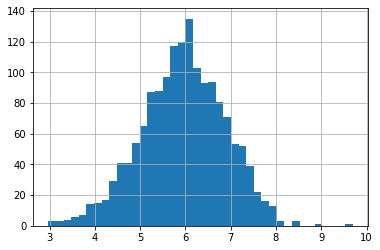

In [102]:
import matplotlib.pyplot as plt
plt.hist(data_all['HIPPOVOL'],bins=40)
plt.grid(True)

In [103]:
data_all['HIPPOVOL'].describe()

count    1588.000000
mean        5.951227
std         0.925175
min         2.971900
25%         5.346000
50%         5.980000
75%         6.600250
max         9.696500
Name: HIPPOVOL, dtype: float64

>Hippocampus verisini daya_labels verisine sütun olarak ekliyorum.

In [104]:
data_labels['HIP_VOL']= data_all['HIPPOVOL']

>data_labels verisinde 'CDRGLOB' oalrak isimlendirilen sütun Alzeimer seviyelerini temsil etmekte olduğundan date_labels'ı inceliyoruz.

In [105]:
data_labels

,Unnamed: 0,CDRGLOB,HIP_VOL
0,1970,0,5.1960
1,1146,0,6.8940
2,675,0,6.2860
3,1268,2,5.5890
4,2323,0,7.4100
...,...,...,...
1583,984,1,7.9400
1584,1325,1,5.3273
1585,788,2,6.5270
1586,195,1,5.3400


> data_labels veri setinin genel olarak ortalamsını, standart sapmasını buluyoruz.

In [106]:
data_labels.describe()

,Unnamed: 0,CDRGLOB,HIP_VOL
count,1588.000000,1588.000000,1588.000000
mean,1246.960957,0.751259,5.951227
std,710.158370,0.825227,0.925175
min,0.000000,0.000000,2.971900
25%,596.750000,0.000000,5.346000
50%,1362.500000,1.000000,5.980000
75%,1849.250000,1.000000,6.600250
max,2419.000000,3.000000,9.696500


>Alzeimer hastalığının seviyelerine göre Hippocampus büyüklüklerinin ortalamasını bulmamız daha iyi çıkarım sağlıyabileceğinden, Alzeimer seviyelerinde göre incelme yapıyoruz.


>1) Önce 'Group by' kullanarak 'CDRGLOB' yani Alzeimer hastalığı seviyesine göre kaç veri/hasta olduğunu buluyoruz.

>2) Daha sonra her bir Alzeimer hastalığı seviyesine göre Hippocampus hacminin ortalamasını ve standart sapmasını alıyoruz.

>'Group by' kullanarak 'CDRGLOB' yani Alzeimer hastalığı seviyesine göre kaç veri/hasta olduğunu buluyoruz.

In [107]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].count()


,HIP_VOL
CDRGLOB,
0,721
1,607
2,194
3,66


>Her bir Alzeimer hastalığı seviyesine göre Hippocampus hacminin ortalamasını ve standart sapmasını alıyoruz.

In [108]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].mean()


,HIP_VOL
CDRGLOB,
0,6.304869
1,5.839063
2,5.323365
3,4.965071


In [109]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].std()


,HIP_VOL
CDRGLOB,
0,0.757105
1,0.866157
2,0.974990
3,1.031115


>Her bir Alzeimer hastalığı seviyesine göre Hippocampus hacminin ortalamasını ve standart sapmasını alıyoruz (Birlikte)

In [110]:
data_labels.groupby('CDRGLOB')[['HIP_VOL']].describe()


HIP_VOL                                                                
          count      mean       std     min       25%      50%      75%     max
CDRGLOB                                                                        
0         721.0  6.304869  0.757105  4.1340  5.781000  6.25570  6.84860  9.6965
1         607.0  5.839063  0.866157  3.0209  5.264750  5.81930  6.40115  8.9606
2         194.0  5.323365  0.974990  2.9719  4.579325  5.35495  5.97160  7.9945
3          66.0  4.965071  1.031115  3.1056  4.347850  4.84365  5.43490  7.7950

>

> Analizi derinleştirmek için farklı etiketlerde dahil ederek bir pivot table oluşturuluyor.

> 1) data_all'dan Cinsiyet faktörünü çekiyorum.

In [111]:
data_labels["GENDER"]=data_all["SEX"]

>2) data_all'dan toplam beyin hacmini çekiyorum.

In [112]:
data_labels["BRN_VOL"]=data_all["NACCBRNV"]

3) data_all'dan toplam cerebraspinal sıvı hacmini çekiyorum.

In [113]:
data_labels["CSF_VOL"]=data_all["CSFVOL"]

4) data_all'dan hasta diyabet mi değil mi onu çekiyorum.

In [114]:
data_labels["DIA"]=data_all["DIABETES"]

>5) data_all'dan MRI çekildiği yaşı çekiyorum.

In [115]:
data_labels['MRI_AGE']=data_all['NACCMRIA']

> Bu faktörlere göre bir pivot tablo oluşturuyorum.

>a- Önce Alzeimer hastalığı seviyesine ve Cinsiyete göre, Beyin, Hippocampüs ve CSF hacim ortalama değerlerini inceliyorum. 

In [116]:
from numpy.ma.core import mean
data_labels.pivot_table(('HIP_VOL','CSF_VOL','BRN_VOL'), index='CDRGLOB', columns=['GENDER'],aggfunc=mean)

BRN_VOL                 CSF_VOL               HIP_VOL          
GENDER             1           2           1           2         1         2
CDRGLOB                                                                     
0        1091.978535  987.443622  366.202114  310.751878  6.597391  6.154305
1        1059.625635  939.845719  380.460073  325.718608  6.094859  5.587446
2        1053.248833  912.288891  409.871892  342.664380  5.667834  4.941454
3        1015.498605  904.580821  431.799895  371.773750  5.151871  4.711557

>b- Aynı pivot tabloya Diabet değişkeninide ekliyorum.

In [117]:
from numpy.ma.core import mean
data_labels.pivot_table(('HIP_VOL','CSF_VOL','BRN_VOL'), index='CDRGLOB', columns=['GENDER','DIA'],aggfunc=mean)

BRN_VOL                                                                                                                   CSF_VOL                                                                                                            HIP_VOL                                                                                      
GENDER             1                                                             2                                                           1                                                         2                                                        1                                              2                                       
DIA               -4            0            1            2         9           -4            0           1            2         9          -4           0           1           2         9          -4           0           1           2          9        -4         0         1       2        9        -4         0         1         2        9
CDRGLOB                                                                                                                                                                                                                                                                                                                                                
0        1145.571818  1105.747614  1020.569196  1204.990667   914.735   982.360690  1000.146268  939.225654   959.844889  883.4485  380.793636  370.637739  343.776478  417.188667  268.1600  329.521034  312.675538  294.539914  336.104222  239.64850  6.546364  6.653361  6.367522  7.3498  5.17710  5.913103  6.195838  6.055759  6.317089  5.53825
1        1080.932600  1067.571506  1029.089603          NaN  1022.259   931.195714   946.904786  911.777931  1002.370667  902.1170  401.497400  386.043751  358.453828         NaN  354.4958  350.660000  333.682885  291.699552  285.198667  339.82725  5.904980  6.082480  6.178164     NaN  5.89528  5.540000  5.538314  5.753831  6.606200  5.36810
2        1136.895000  1059.601447  1017.482417   977.087000   927.505  1007.905000   914.858639  887.083600   940.154000  899.2690  425.080000  414.271600  387.037083  396.101500  307.0390  383.950000  348.743986  312.716800  285.295000  335.80450  6.695000  5.605906  5.978192  5.1309  6.22700  5.640000  4.958061  4.934067  3.632000  4.35520
3        1100.350000  1022.123484   981.120000          NaN   897.169          NaN   896.256950  934.124333   899.189000       NaN  478.620000  435.997613  399.828400         NaN  414.7080         NaN  371.019800  380.069000  354.427500        NaN  5.290000  5.123806  5.406800     NaN  4.60910       NaN  4.778150  4.750717  3.928150      NaN

>c- Aynı pivot tablodan Diabeti çıkartıp bu sefer MRI çekildiği yaş değişkenini ekliyorum.

In [118]:
from numpy.ma.core import mean
data_labels.pivot_table(('HIP_VOL','CSF_VOL','BRN_VOL'), index='CDRGLOB', columns=['GENDER','MRI_AGE'],aggfunc=mean)

BRN_VOL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  \
GENDER          1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2                                                                                                                                                                                                                                                                                                                                                                               
MRI_AGE        43        48        49        50        51       52        53        54           55           56           57         58         59           60           61          62         63           64           65           66           67          68         69           70         71           72           73           74           75           76           77           78           79           80           81        82           83           84           85           86           87           88           89         90           91         92        93        94        95        96       97       99        44        45           46          47         48          49        50       51          52           53        54          55          56           57         58           59           60          61           62           63           64           65           66           67           68           69           70          71          72           73          74   
CDRGLOB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0             NaN  118

NOT: Bazı yaş değerlerinde NaN çıktığı için yaşları 10'ar 10'ar grupluyorum.

In [119]:
from numpy.ma.core import mean
data_labels['decade'] = 10 * (data_labels['MRI_AGE'] // 10)
data_labels.pivot_table(('HIP_VOL','CSF_VOL','BRN_VOL'), index='CDRGLOB', columns=['GENDER','decade'],aggfunc=mean)

BRN_VOL                                                                                                                                              CSF_VOL                                                                                                                                     HIP_VOL                                                                                                              
GENDER           1                                                                             2                                                                      1                                                                       2                                                                   1                                                           2                                                  
decade          40           50           60           70           80           90           40           50           60          70          80          90       40          50          60          70          80          90          40          50          60          70          80          90      40        50        60        70        80        90        40        50        60        70        80        90
CDRGLOB                                                                                                                                                                                                                                                                                                                                                                                                                          
0        1136.8315  1209.264867  1131.749560  1068.035283  1046.605540  1025.032375  1092.684714  1053.193681  1018.326883  972.823795  931.591206  888.400937  302.561  341.545267  333.213920  362.394750  400.914032  451.180125  282.142071  275.338319  294.902766  312.520925  343.186941  380.525125  6.6685  7.265637  6.891856  6.491508  6.297481  5.812750  6.735143  6.486199  6.269758  6.142220  5.813143  5.648119
1        1151.3190  1077.192333  1105.819920  1069.885221  1024.166814  1014.531200  1087.991500   999.790000   974.167673  942.103136  919.380786  863.706154  294.749  361.345333  355.089640  375.047464  399.743412  410.345900  317.110500  306.972750  306.529000  319.110659  340.237071  374.326077  4.8566  6.419133  6.659884  6.116623  5.810131  5.753450  6.533700  5.785633  5.709947  5.692073  5.438637  4.856631
2        1251.5810  1117.271200  1081.489625  1065.699556  1011.095750   992.688667          NaN   980.943500   967.280300  930.771533  887.231578  828.478000  356.051  360.059600  411.080438  406.909333  420.961188  430.539667         NaN  408.564250  339.651300  342.484733  337.359311  346.214000  5.5890  6.294600  5.996769  5.666162  5.435428  5.399267       NaN  5.708375  5.125150  5.050300  4.800896  4.326500
3              NaN  1032.443750  1068.884750  1072.707286   988.234700   969.996000  1033.386000   939.918500   963.547000  887.106000  902.084917  863.296250      NaN  419.790500  414.930000  434.089286  435.207100  442.249000  383.615000  379.434500  344.574000  350.137571  377.129583  400.378750     NaN  5.709425  5.491875  5.516914  4.830345  5.246867  5.810700  5.436550  6.305550  3.990729  4.611433  4.839100

d- Diabet değişkenini son olarak pivot tabloma tekrardan ekliyorum.

In [120]:
from numpy.ma.core import mean

data_labels.pivot_table(('HIP_VOL','CSF_VOL','BRN_VOL'), index='CDRGLOB', columns=['GENDER','decade','DIA'],aggfunc=mean)

BRN_VOL                                                                                                                                                                                                                                                                                                                                                                                                                                                                 CSF_VOL                                                                                                                                                                                                                                                                                                                                                                                                                                      HIP_VOL                                                                                             \
GENDER           1                                                                                                                                                                                                                       2                                                                                                                                                                                                                                               1                                                                                                                                                                                                     2                                                                                                                                                                                                                                      1                                                                                              
decade          40           50                  60                                  70                                                               80                                                90                              40           50                                60                                            70                                          80                                                     90                                              40          50                60                                70                                                        80                                            90                            40          50                         60                                           70                                           80                                                    90                                              40        50             60                            70                                       
DIA              0            0          1       -4            0            1        -4            0            1            2            9           -4            0            1          9            0         1        9            0            0         1          2           -4            0           1        9          -4           0           1         2        -4           0           1         2           9       -4           0        1        2        9        0           0        1       -4           0           1        -4           0           1           2           9        -4           0           1         9           0        1        9           0           0         1        2      -4           0           1        9          -4           0           1         2         -4           0           1         2           9      -4           0         1        2        9       0         0      1      -4         0         1        -4         0         1       2       9   
CDRGLOB            